In [77]:
# Import necessary libraries
import numpy as np          # For numerical operations and arrays
import matplotlib.pyplot as plt  # For plotting and visualization

In [78]:
# Define positive class data points (label = +1)
# These points are chosen to require multiple iterations for learning
positive_points = np.array([[-2,3], [0,1], [2, -1]])
print("Positive points:")
positive_points

Positive points:


array([[-2,  3],
       [ 0,  1],
       [ 2, -1]])

In [79]:
# Define negative class data points (label = -1)
# These points are chosen to require multiple iterations for learning
negative_points = np.array([[-2,1], [0, -1], [2,-3]])
print("Negative points:")
negative_points

Negative points:


array([[-2,  1],
       [ 0, -1],
       [ 2, -3]])

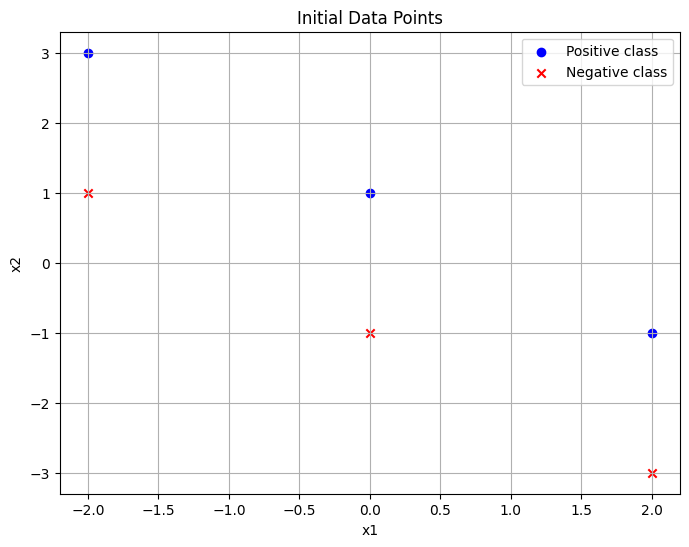

In [80]:
# Visualize the initial data points
plt.figure(figsize=(8, 6))
# Plot positive points as blue circles
plt.scatter(positive_points[:, 0], positive_points[:, 1], c='blue', marker='o', label='Positive class')
# Plot negative points as red x's
plt.scatter(negative_points[:, 0], negative_points[:, 1], c='red', marker='x', label='Negative class')
plt.xlabel('x1')  # Feature 1
plt.ylabel('x2')  # Feature 2
plt.title('Initial Data Points')
plt.grid(True)
plt.legend()
plt.show()

In [81]:
# Combine positive and negative points into feature matrix X
# Each row is a data point [x1, x2]
X = np.vstack((positive_points, negative_points))
print("Feature matrix X:")
X

Feature matrix X:


array([[-2,  3],
       [ 0,  1],
       [ 2, -1],
       [-2,  1],
       [ 0, -1],
       [ 2, -3]])

In [82]:
# Create label vector y
# +1 for positive class, -1 for negative class
y = np.array([1] * len(positive_points) + [-1] * len(negative_points))
print("Label vector y:")
y

Label vector y:


array([ 1,  1,  1, -1, -1, -1])

In [83]:
def plot_decision_boundary(theta, theta0, iteration):
    plt.figure(figsize=(8, 6))
    
    # Plot the positive and negative points
    plt.scatter(positive_points[:, 0], positive_points[:, 1], color='blue', label='Positive class')
    plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', label='Negative class')

    # Plot decision boundary
    x_values = np.linspace(-3, 3, 2)

    # Check for theta[1] to avoid division by zero in case of vertical line
    if theta[1] != 0:
        y_values = -(theta[0] * x_values + theta0) / theta[1]
        plt.plot(x_values, y_values, label=f'Iteration {iteration}')
    else:
        # Plot vertical line
        x_val = -theta0 / theta[0]
        plt.axvline(x=x_val, label=f'Iteration {iteration}')
    
    plt.xlim(-3, 3)
    plt.ylim(-4, 4)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Decision Boundary at Iteration {iteration}')
    plt.legend()
    plt.show()

In [84]:
# Perceptron algorithm
def perceptron(X, y, steps=10):
    theta = np.zeros(X.shape[1])
    theta0 = 0

    for t in range(steps):
        for i, xi in enumerate(X):
            if y[i] * (np.dot(xi, theta) + theta0) <= 0:
                theta += y[i] * xi
                theta0 += y[i]
                break  # Stop after first misclassified point

        # Plot after each iteration
        plot_decision_boundary(theta, theta0, t + 1)

    return theta, theta0


=== PERCEPTRON LEARNING ALGORITHM ===
Training data shape: (6, 2)
Labels: [ 1  1  1 -1 -1 -1]

Starting perceptron training...



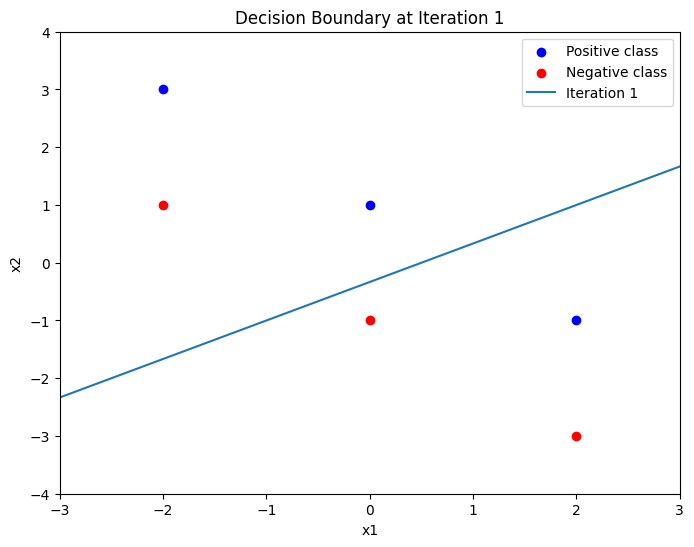

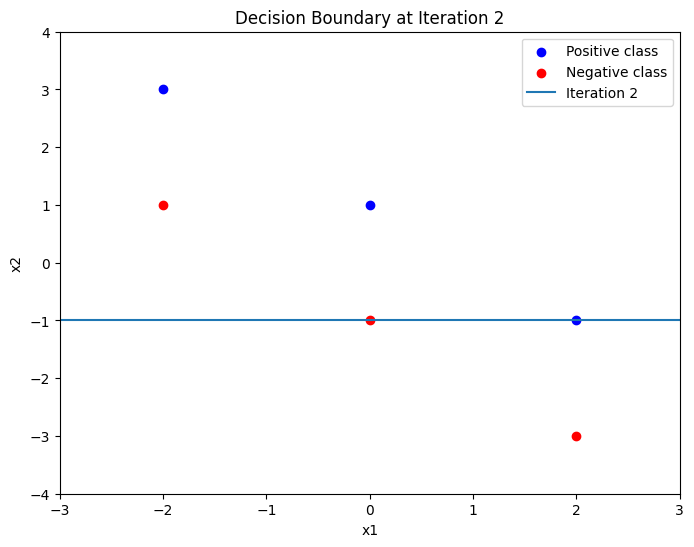

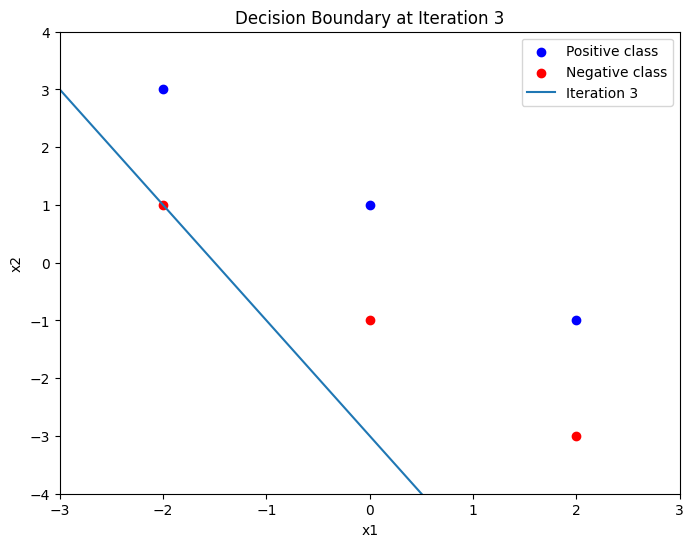

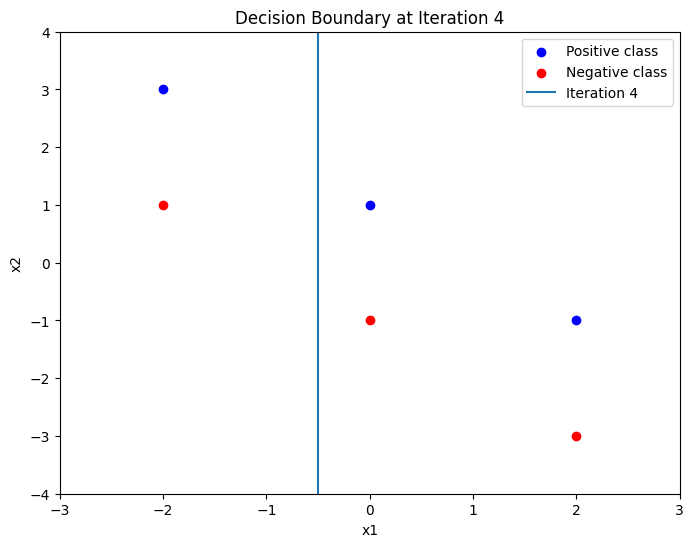

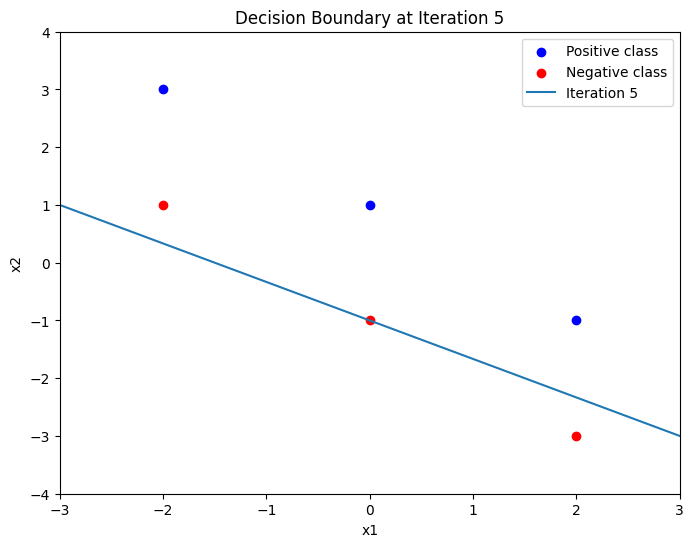

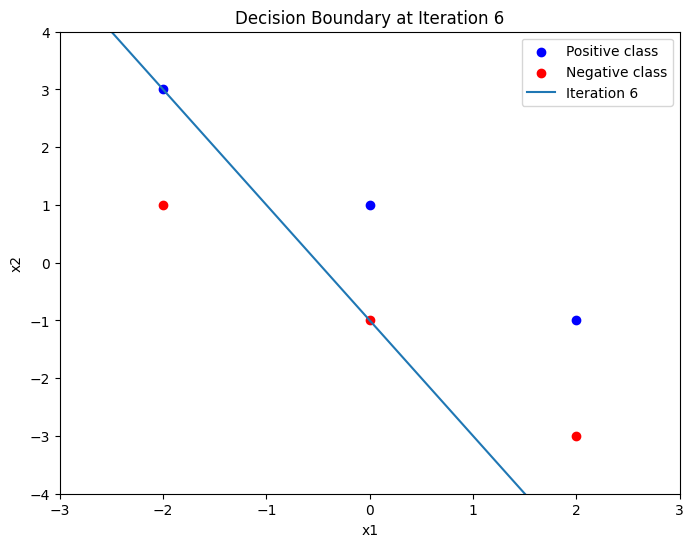

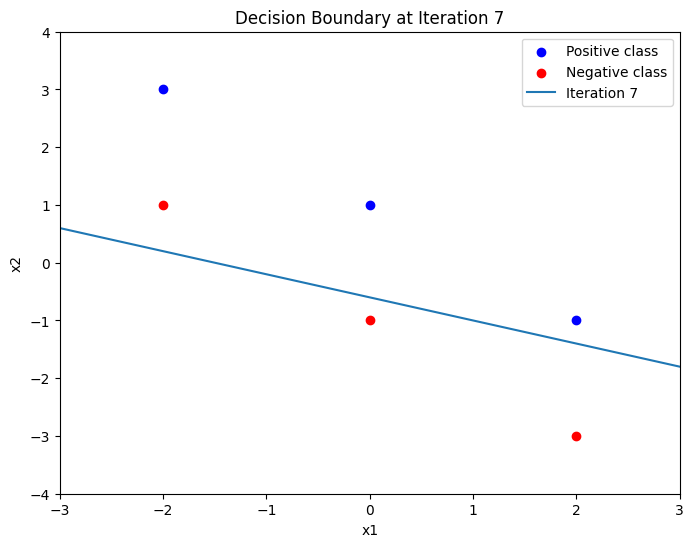

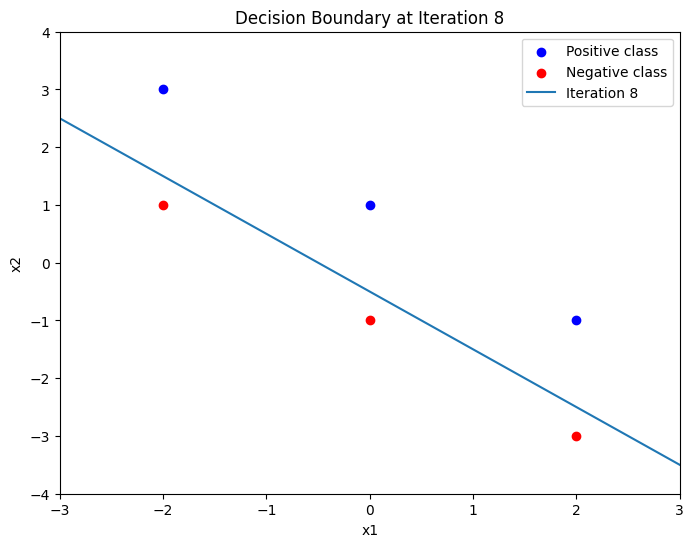

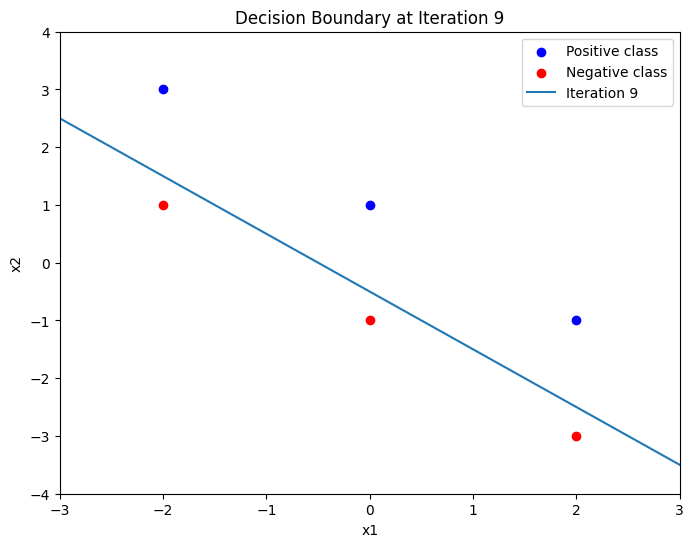

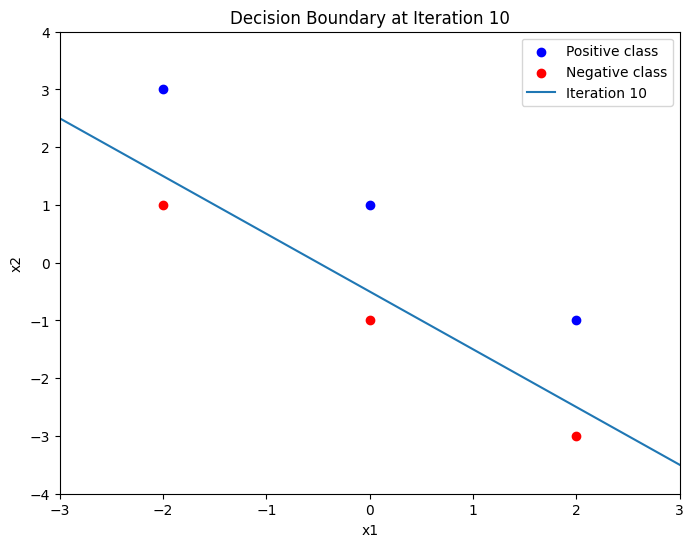


=== FINAL RESULTS ===
Final weight vector (theta): [4. 4.]
Final bias term (theta_0): 2

Final decision boundary equation: 4.00*x1 + 4.00*x2 + 2.00 = 0

=== TESTING FINAL CLASSIFIER ===
Point 0: [-2  3] -> Predicted:  1, Actual:  1, Correct: True
Point 1: [0 1] -> Predicted:  1, Actual:  1, Correct: True
Point 2: [ 2 -1] -> Predicted:  1, Actual:  1, Correct: True
Point 3: [-2  1] -> Predicted: -1, Actual: -1, Correct: True
Point 4: [ 0 -1] -> Predicted: -1, Actual: -1, Correct: True
Point 5: [ 2 -3] -> Predicted: -1, Actual: -1, Correct: True

Training Accuracy: 100.0% (6/6)


In [85]:
# Run the perceptron algorithm
print("=== PERCEPTRON LEARNING ALGORITHM ===")
print(f"Training data shape: {X.shape}")
print(f"Labels: {y}")
print("\nStarting perceptron training...\n")

# Train for up to 10 passes through the data
# (Algorithm will stop early if it converges)
theta_final, theta_0_final = perceptron(X, y, 10)

print("\n=== FINAL RESULTS ===")
print(f"Final weight vector (theta): {theta_final}")
print(f"Final bias term (theta_0): {theta_0_final}")
print(f"\nFinal decision boundary equation: {theta_final[0]:.2f}*x1 + {theta_final[1]:.2f}*x2 + {theta_0_final:.2f} = 0")

# Test the final classifier on training data
print("\n=== TESTING FINAL CLASSIFIER ===")
correct = 0
for i, x_i in enumerate(X):
    prediction = np.sign(np.dot(theta_final, x_i) + theta_0_final)
    actual = y[i]
    is_correct = prediction == actual
    correct += is_correct
    print(f"Point {i}: {x_i} -> Predicted: {prediction:2.0f}, Actual: {actual:2.0f}, Correct: {is_correct}")

accuracy = correct / len(X) * 100
print(f"\nTraining Accuracy: {accuracy:.1f}% ({correct}/{len(X)})")